Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.

In [39]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [40]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('creditcard.csv')

Set the option to show maximum columns:

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
# print the first 5 rows of the dataframe
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Explore the Data

In [43]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101105 entries, 0 to 101104
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    101105 non-null  int64  
 1   V1      101105 non-null  float64
 2   V2      101105 non-null  float64
 3   V3      101105 non-null  float64
 4   V4      101105 non-null  float64
 5   V5      101105 non-null  float64
 6   V6      101105 non-null  float64
 7   V7      101105 non-null  float64
 8   V8      101105 non-null  float64
 9   V9      101105 non-null  float64
 10  V10     101105 non-null  float64
 11  V11     101105 non-null  float64
 12  V12     101105 non-null  float64
 13  V13     101105 non-null  float64
 14  V14     101105 non-null  float64
 15  V15     101105 non-null  float64
 16  V16     101105 non-null  float64
 17  V17     101105 non-null  float64
 18  V18     101105 non-null  float64
 19  V19     101105 non-null  float64
 20  V20     101105 non-null  float64
 21  V21     10

In [44]:
df.shape

(101105, 31)

column names:

In [45]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

---

In [46]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101105.000000,101104.000000,101104.000000,101104.000000,101104.000000,101104.000000,101104.000000,101104.000000,101104.000000,101104.000000,101104.000000
mean,42707.761743,-0.261114,-0.033099,0.681348,0.158361,-0.281613,0.097321,-0.112561,0.057581,-0.045523,-0.022429,0.246369,-0.065227,0.002567,0.054936,0.187370,-0.005392,0.059779,-0.095597,-0.019764,0.044527,-0.030644,-0.105992,-0.037573,0.009152,0.132925,0.026396,0.001291,0.001742,97.483832,0.002216
std,17151.524260,1.855406,1.652178,1.322789,1.348589,1.357435,1.302661,1.212789,1.208281,1.119085,1.068713,1.066818,1.109338,1.038638,0.965099,0.935027,0.897559,0.940916,0.846330,0.817645,0.757644,0.718356,0.635604,0.630822,0.595334,0.440769,0.493744,0.393280,0.324271,264.244359,0.047018
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33540.000000,-1.027912,-0.599797,0.178381,-0.715351,-0.903790,-0.645197,-0.604525,-0.136434,-0.695851,-0.494385,-0.527159,-0.483225,-0.682995,-0.337832,-0.365416,-0.479511,-0.400474,-0.566603,-0.514496,-0.168869,-0.223868,-0.529712,-0.176973,-0.323376,-0.131291,-0.324386,-0.062208,-0.005314,7.400000,0.000000
50%,44538.000000,-0.262492,0.075867,0.757766,0.186870,-0.316182,-0.153999,-0.071350,0.075696,-0.115993,-0.094092,0.176076,0.111843,-0.011639,0.074703,0.296970,0.069846,-0.000018,-0.089088,-0.023325,-0.024160,-0.056773,-0.081433,-0.049716,0.065023,0.171362,-0.070147,0.010233,0.023325,25.980000,0.000000
75%,56272.000000,1.153574,0.733153,1.382607,1.029678,0.248352,0.491376,0.412229,0.364539,0.559882,0.438302,1.061418,0.622519,0.679256,0.488040,0.863646,0.540459,0.459124,0.385985,0.482949,0.170528,0.120727,0.313182,0.080913,0.406381,0.420981,0.298860,0.083900,0.076659,88.712500,0.000000
max,67726.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.249433,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


---

In [47]:
# distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

0.0    100880
1.0       224
Name: Class, dtype: int64

In [48]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [49]:
# statistical measures of the legit data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.000000,100880.0
mean,42720.593705,-0.248362,-0.042269,0.700320,0.147897,-0.272530,0.101470,-0.098956,0.051708,-0.039246,-0.008862,0.237110,-0.049793,0.002609,0.071808,0.187277,0.005244,0.078018,-0.089257,-0.021577,0.043851,-0.032295,-0.105959,-0.037082,0.009409,0.132761,0.026224,0.000138,0.001661,97.438047,0.0
std,17147.810362,1.803386,1.630352,1.201656,1.324607,1.317000,1.298875,1.139880,1.181174,1.106303,1.009390,1.041101,1.039286,1.038541,0.873822,0.935187,0.849524,0.786580,0.824673,0.814330,0.757073,0.716042,0.635230,0.627120,0.595523,0.439198,0.493902,0.389359,0.323461,264.259478,0.0
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.049895,-15.144988,-5.791881,-13.780377,-4.152532,-10.115560,-17.098444,-5.366660,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.0
25%,33550.000000,-1.023665,-0.601712,0.182570,-0.716851,-0.900881,-0.642403,-0.602132,-0.136587,-0.691993,-0.491046,-0.528608,-0.478047,-0.682436,-0.334895,-0.365635,-0.476534,-0.398780,-0.563913,-0.514792,-0.168902,-0.224124,-0.529657,-0.176678,-0.323158,-0.131201,-0.324619,-0.062277,-0.005298,7.480000,0.0
50%,44555.500000,-0.259418,0.074387,0.760211,0.182660,-0.315302,-0.152336,-0.070182,0.075195,-0.114661,-0.093095,0.172424,0.113734,-0.011851,0.076315,0.297054,0.071416,0.001201,-0.088207,-0.024324,-0.024424,-0.057122,-0.081544,-0.049605,0.065118,0.171362,-0.070380,0.010066,0.023287,25.990000,0.0
75%,56276.000000,1.154043,0.729479,1.384229,1.024283,0.248729,0.492728,0.413353,0.363229,0.561224,0.440290,1.056425,0.623733,0.678776,0.489230,0.863646,0.541298,0.459732,0.386651,0.481177,0.169580,0.119635,0.312879,0.080859,0.406482,0.420636,0.298305,0.083380,0.076383,88.500000,0.0
max,67725.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,18.709255,10.392889,13.249433,10.002190,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,4.891062,39.420904,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,0.0


In [50]:
legit.Amount.describe()

count    100880.000000
mean         97.438047
std         264.259478
min           0.000000
25%           7.480000
50%          25.990000
75%          88.500000
max       19656.530000
Name: Amount, dtype: float64

In [51]:
# statistical measures of the fraud data
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.0
mean,36817.107143,-6.002024,4.098758,-7.871751,4.878291,-4.369771,-1.774953,-6.235919,2.700881,-2.874648,-6.133668,4.416571,-7.015378,-0.011848,-7.536709,0.240738,-4.798323,-8.156315,-2.946582,0.794874,0.348790,0.712737,-0.120749,-0.258527,-0.106577,0.206830,0.103959,0.520878,0.038175,118.103393,1.0
std,17796.109784,7.509556,4.239809,8.150635,2.897546,5.826866,1.623242,6.428859,4.872198,2.464155,4.395762,2.857193,4.549935,1.083668,4.340595,0.845825,3.955818,7.317366,2.984463,1.566070,0.936241,1.209636,0.787640,1.567655,0.490373,0.902734,0.410568,1.127759,0.584526,257.090668,0.0
min,406.000000,-30.552380,-6.976420,-31.103685,-1.313275,-22.105532,-5.080408,-21.922811,-3.569444,-9.283925,-18.271168,-1.064534,-17.769143,-3.127795,-19.214325,-2.129728,-13.563273,-25.162799,-9.498746,-3.602657,-4.128186,-2.475962,-2.288686,-19.254328,-1.632653,-4.781606,-1.055997,-3.908080,-1.869290,0.000000,1.0
25%,24236.750000,-8.532487,1.343134,-12.434417,2.678762,-7.025001,-2.862492,-10.917855,0.051138,-4.080280,-8.737614,2.559422,-9.706076,-0.892564,-10.018205,-0.306328,-7.570405,-13.041661,-4.870179,-0.152567,-0.127017,0.138310,-0.600437,-0.520239,-0.427823,-0.223255,-0.222261,0.039756,-0.118703,1.000000,1.0
50%,41127.000000,-3.015003,2.998931,-5.064519,4.489211,-2.451058,-1.733427,-3.657506,0.842849,-2.461589,-5.221852,4.081736,-6.852274,0.171157,-7.174365,0.265516,-4.332539,-6.936117,-2.554864,0.785578,0.313468,0.628618,-0.037632,-0.139737,-0.037405,0.171761,0.068593,0.551796,0.173555,8.565000,1.0
75%,51140.000000,-0.945247,6.310009,-1.792792,6.425729,-0.507073,-0.593304,-1.492058,3.363212,-1.007652,-2.971949,5.968435,-3.560404,0.822983,-4.727200,0.849952,-2.013828,-3.456297,-0.602749,1.746283,0.983330,1.755227,0.399870,0.195886,0.179843,0.674143,0.441927,1.284070,0.398768,99.990000,1.0
max,67571.000000,1.296231,16.713389,2.041003,11.927512,5.269255,3.874668,5.431271,20.007208,2.820829,3.245086,12.018913,1.375941,1.998126,1.500794,2.220238,2.581851,6.739384,3.042493,5.228342,3.209171,3.147428,1.745315,2.661291,0.795190,2.208209,1.246604,3.052358,1.130625,1809.680000,1.0


In [52]:
fraud.Amount.describe()

count     224.000000
mean      118.103393
std       257.090668
min         0.000000
25%         1.000000
50%         8.565000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [53]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,42720.593705,-0.248362,-0.042269,0.700320,0.147897,-0.272530,0.101470,-0.098956,0.051708,-0.039246,-0.008862,0.237110,-0.049793,0.002609,0.071808,0.187277,0.005244,0.078018,-0.089257,-0.021577,0.043851,-0.032295,-0.105959,-0.037082,0.009409,0.132761,0.026224,0.000138,0.001661,97.438047
1.0,36817.107143,-6.002024,4.098758,-7.871751,4.878291,-4.369771,-1.774953,-6.235919,2.700881,-2.874648,-6.133668,4.416571,-7.015378,-0.011848,-7.536709,0.240738,-4.798323,-8.156315,-2.946582,0.794874,0.348790,0.712737,-0.120749,-0.258527,-0.106577,0.206830,0.103959,0.520878,0.038175,118.103393


In [54]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
legit_sample = legit.sample(n=492)

# Concatenating two DataFrames
new_df = pd.concat([legit_sample, fraud], axis=0)
# Print first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84730,60434,-1.892919,1.587756,0.508562,-1.638284,-0.464246,-0.207836,-0.122353,0.624957,0.662515,0.627438,0.972833,0.390074,-0.829065,0.256041,0.217591,0.695738,-0.620295,-0.155191,-0.786601,0.172402,-0.030179,-0.243443,0.073874,-0.307304,-0.212020,0.721419,-0.185343,0.176103,3.84,0.0
5649,5876,-1.561808,-0.435692,3.240244,0.458000,-1.305637,0.452630,-0.342204,0.065163,1.236430,-0.525306,-0.494296,-1.916822,2.178960,-0.084585,-3.101938,-2.064763,1.190491,1.181189,-1.254950,-0.737543,-0.597022,-0.508506,-0.239875,0.667982,0.383789,-0.429763,-0.066286,0.161686,138.00,0.0
50837,44670,-0.258946,-3.205642,-0.883250,0.184783,-1.694033,-0.779742,0.892412,-0.528744,-0.878899,0.172510,-0.458661,-0.389644,0.281402,-0.026776,-0.135852,0.633463,0.640678,-1.500253,0.535134,1.829018,0.680034,0.039679,-0.933879,0.498130,0.472875,-0.158914,-0.173264,0.156061,882.54,0.0
10191,15742,0.964633,-0.253036,1.364595,1.361129,-0.935403,0.291632,-0.837475,0.182350,1.734585,-0.237937,1.793709,-1.951768,1.504893,1.534941,0.177561,1.097278,-0.397581,1.532640,-0.658907,0.035417,0.182806,0.574665,-0.186198,-0.061471,0.307710,-0.282338,0.024750,0.038917,100.00,0.0
66717,52186,-0.093023,0.810356,0.816957,1.459015,-0.111556,1.377689,-1.093148,-2.285012,-0.647417,-0.564140,1.281608,1.176387,-0.820298,0.879442,-0.129769,-1.010004,0.786974,-0.708025,0.274625,0.596736,-1.259727,0.594649,0.006093,-0.290984,0.701232,-0.131468,0.147702,0.232605,19.09,0.0


In [55]:
# Getting the distribution of the classes for the subsample dataset
new_df['Class'].value_counts()

0.0    492
1.0    224
Name: Class, dtype: int64

- I have performed the column of Class is divided into two parts: legit and fraud.
- Dividing the class column into two parts resulted in data imbalance, to balance the imbalance I took the sample size of the legitimate part equal to that of the fraud part.

Dealing with missing values

In [56]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)

Class     1
Amount    1
V28       1
V27       1
V26       1
V25       1
V24       1
V23       1
V22       1
V21       1
V16       0
V20       0
V19       0
V18       0
V17       0
Time      0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V15       0
dtype: int64

Model Selection and Evaluation

In [57]:
new_df.shape

(716, 31)

In [58]:
# Splitting the data into Features & Targets
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

#### Train_test_split the Data:

In [59]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)

(716, 30) (572, 30) (144, 30)


In [61]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [62]:
# import pipeline
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline



Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9650800915331809
Test Accuracy: 0.9375
Recall Score:  0.8181818181818182
Precision Score:  0.972972972972973
F1 Score:  0.8888888888888891


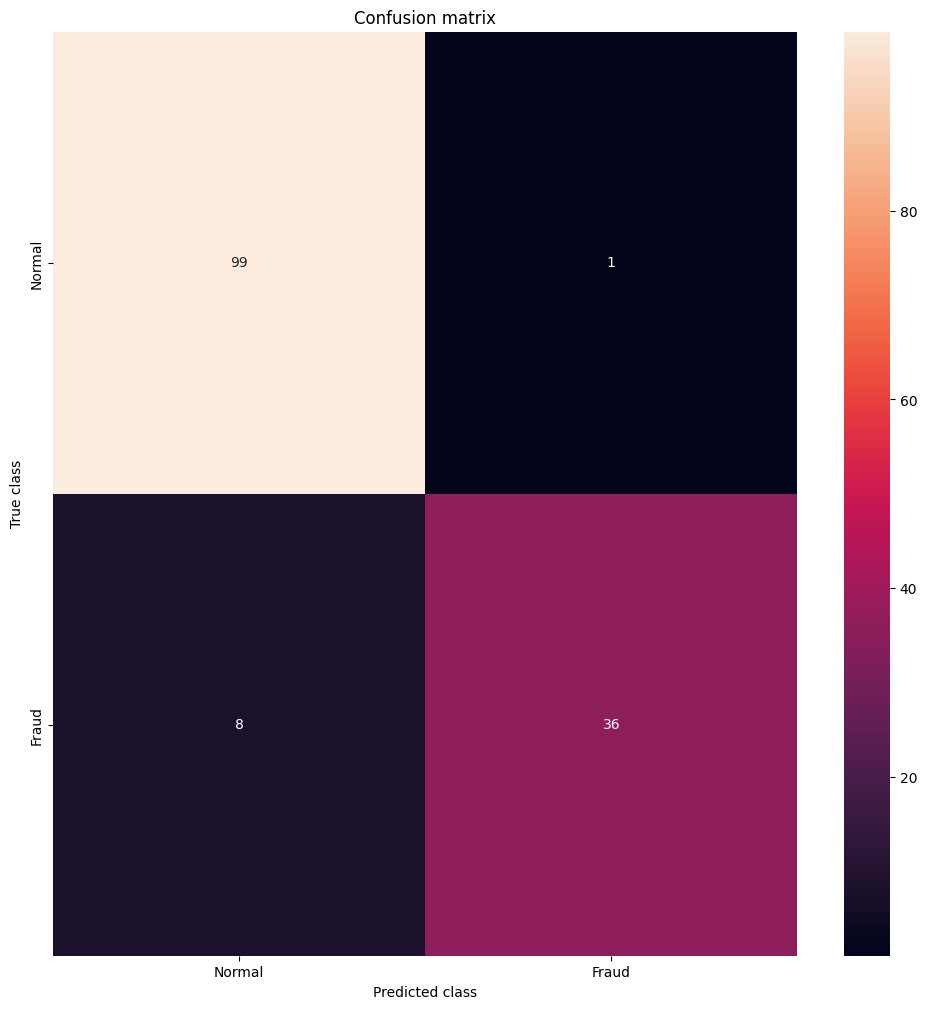

In [63]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Feature Engineering

In [64]:
df_train = new_df.copy()
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84730,60434,-1.892919,1.587756,0.508562,-1.638284,-0.464246,-0.207836,-0.122353,0.624957,0.662515,0.627438,0.972833,0.390074,-0.829065,0.256041,0.217591,0.695738,-0.620295,-0.155191,-0.786601,0.172402,-0.030179,-0.243443,0.073874,-0.307304,-0.212020,0.721419,-0.185343,0.176103,3.84,0.0
5649,5876,-1.561808,-0.435692,3.240244,0.458000,-1.305637,0.452630,-0.342204,0.065163,1.236430,-0.525306,-0.494296,-1.916822,2.178960,-0.084585,-3.101938,-2.064763,1.190491,1.181189,-1.254950,-0.737543,-0.597022,-0.508506,-0.239875,0.667982,0.383789,-0.429763,-0.066286,0.161686,138.00,0.0
50837,44670,-0.258946,-3.205642,-0.883250,0.184783,-1.694033,-0.779742,0.892412,-0.528744,-0.878899,0.172510,-0.458661,-0.389644,0.281402,-0.026776,-0.135852,0.633463,0.640678,-1.500253,0.535134,1.829018,0.680034,0.039679,-0.933879,0.498130,0.472875,-0.158914,-0.173264,0.156061,882.54,0.0
10191,15742,0.964633,-0.253036,1.364595,1.361129,-0.935403,0.291632,-0.837475,0.182350,1.734585,-0.237937,1.793709,-1.951768,1.504893,1.534941,0.177561,1.097278,-0.397581,1.532640,-0.658907,0.035417,0.182806,0.574665,-0.186198,-0.061471,0.307710,-0.282338,0.024750,0.038917,100.00,0.0
66717,52186,-0.093023,0.810356,0.816957,1.459015,-0.111556,1.377689,-1.093148,-2.285012,-0.647417,-0.564140,1.281608,1.176387,-0.820298,0.879442,-0.129769,-1.010004,0.786974,-0.708025,0.274625,0.596736,-1.259727,0.594649,0.006093,-0.290984,0.701232,-0.131468,0.147702,0.232605,19.09,0.0


In [65]:
def display_feature_importance(model,percentage ,top_n=34, plot=False):
    X = df_train.drop('Class',axis=1)
    y = df_train['Class']

    model.fit(X, y)

    feature_importance = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # A threshold is calculated based on a specified percentage of the top feature importance.Features with importance above this threshold are selected.
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

    print("Selected Features by {} \n \n at threshold {}%; {}".format(model , percentage,selected_features))

    if plot==True:
        sns.set(style="whitegrid", palette="viridis")

        # Display the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()

    selected_features.append('Class')

    return selected_features

In [66]:
# List to store selected features for each model and trial percentage
selected_features_xgb = []

auc_scores = []

# List of trial percentages
trial_percentages = [3, 5, 10, 20, 40]

# Loop over each trial percentage
for percentage in trial_percentages:
        xgb_selected_features = display_feature_importance(XGBClassifier(random_state=42), percentage=percentage)

        selected_features_xgb.append(xgb_selected_features)

        X = df_train.drop('Class',axis=1)
        y = df_train['Class']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Fit models on training data
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train[[feature for feature in xgb_selected_features if feature != 'Class']], y_train, verbose=0)

        # Predict probabilities on the test set
        xgb_pred_proba = xgb_model.predict_proba(X_test[[feature for feature in xgb_selected_features if feature != 'Class']])[:, 1]

        # Calculate AUC scores and append to the list
        from sklearn.metrics import roc_auc_score

        auc_xgb = roc_auc_score(y_test, xgb_pred_proba)
        auc_scores.append((auc_xgb,percentage))

        # Sorted AUC
        sorted_auc = sorted(auc_scores, reverse=True)

# Print Each AUC with Percentage
for score , percentage in sorted_auc :
        print(f'The AUC for {type(xgb_model).__name__ , } \n with {percentage}% of top features is {score:.4f}')

Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
 
 at threshold 3%; ['V14', 'V10', 'V12', 'V20', 'V4', 'V17', 'V27', 'V5', 'V7', 'V15', 'V13']
Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsamp

In [67]:
# Impottant Feature Extract Using XGb
imp_fea = ['V14', 'V10', 'V4', 'V7', 'V21', 'V8', 'V20', 'V3', 'V5', 'V11', 'V12', 'V26', 'V17','Class']
df_train = df_train[imp_fea]
df_train.head()

,V14,V10,V4,V7,V21,V8,V20,V3,V5,V11,V12,V26,V17,Class
84730,0.256041,0.627438,-1.638284,-0.122353,-0.030179,0.624957,0.172402,0.508562,-0.464246,0.972833,0.390074,0.721419,-0.620295,0.0
5649,-0.084585,-0.525306,0.458000,-0.342204,-0.597022,0.065163,-0.737543,3.240244,-1.305637,-0.494296,-1.916822,-0.429763,1.190491,0.0
50837,-0.026776,0.172510,0.184783,0.892412,0.680034,-0.528744,1.829018,-0.883250,-1.694033,-0.458661,-0.389644,-0.158914,0.640678,0.0
10191,1.534941,-0.237937,1.361129,-0.837475,0.182806,0.182350,0.035417,1.364595,-0.935403,1.793709,-1.951768,-0.282338,-0.397581,0.0
66717,0.879442,-0.564140,1.459015,-1.093148,-1.259727,-2.285012,0.596736,0.816957,-0.111556,1.281608,1.176387,-0.131468,0.786974,0.0


In [68]:
df_train.shape

(716, 14)

Random Forest

In [69]:
def train_random_forest(data, target):
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0,class_weight='balanced')

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_rf = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    return best_rf_model, best_params, accuracy


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 0.97
Precision on Test Set: 1.00
Recall on Test Set: 0.89


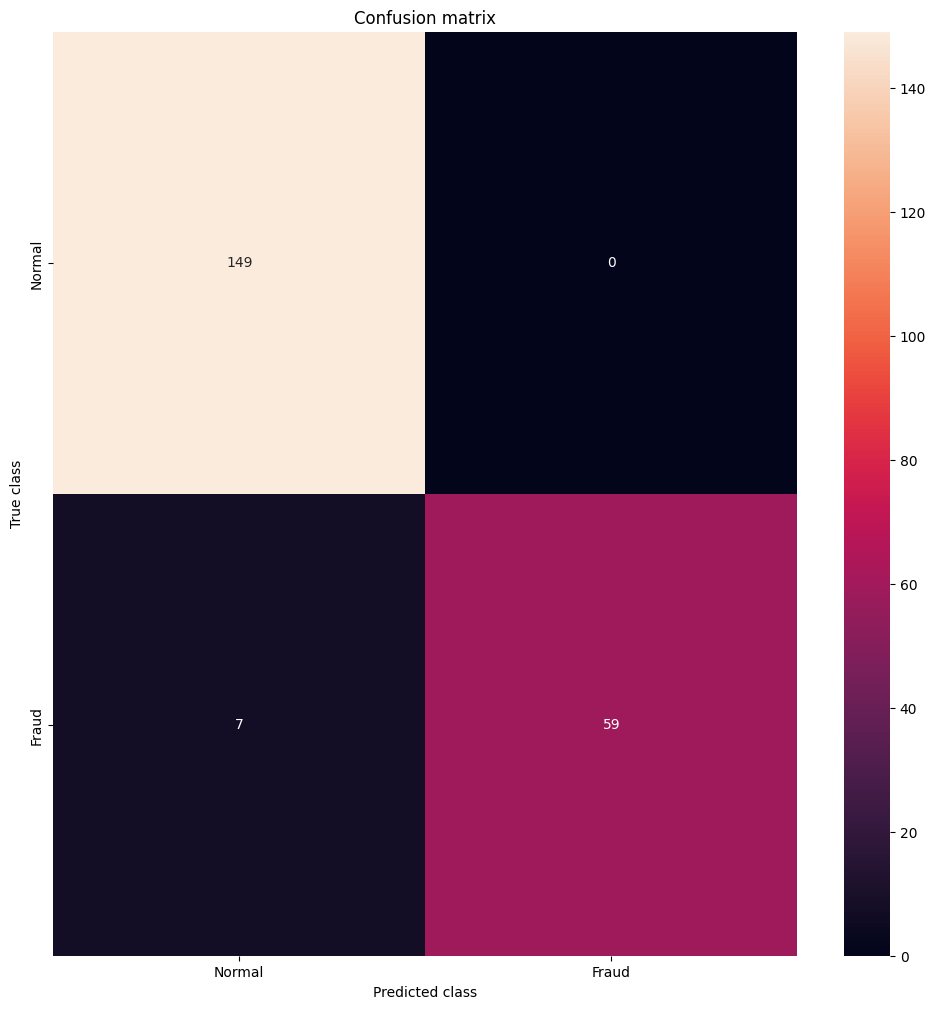

(RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=0),
 {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.9674418604651163)

In [70]:
train_random_forest(df_train,'Class')

XGBoost

In [71]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


    return best_xgb_model, best_params

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy on Test Set: 0.97
Precision on Test Set: 1.00
Recall on Test Set: 0.91


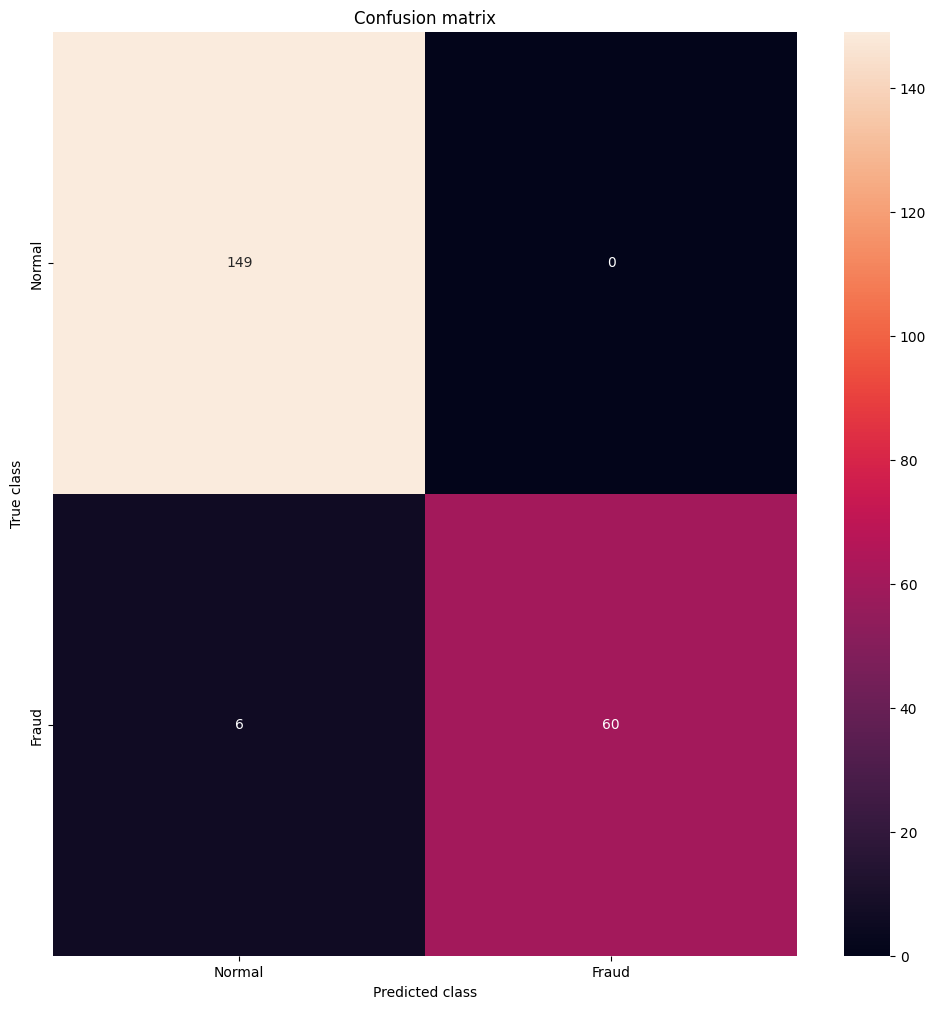

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=1, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...),
 {'colsample_bytree': 0.8,
  'gamma': 1,
  'learning_rate': 0.2,
  'max_depth': 3,
  'n_estimators': 50,
  'subsample': 0.8})

In [72]:
train_xgb_classifier(df_train,'Class')

In [73]:
# Selcting Best and Highest Accuracy from Above trained Models
models = ['XGB Classifier', 'RandomForestClassifier']
accuracy_scores = [accuracy, accuracy]

# Find the index of the maximum accuracy
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))

# Print the best model for accuracy
print(f'Best Accuracy: {accuracy_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')

Best Accuracy: 0.94 with Model: XGB Classifier


Thus the best accuracy is 0.93 for XGB Classifier.